In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [65]:
from sklearn.datasets import load_iris

In [66]:
iris = load_iris()

In [67]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [69]:
# Independent and Dependent Features
X = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [78]:
X.shape

(150, 4)

In [70]:
y = iris['target']

In [71]:
## Train Test Split
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
## Apply Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [107]:
treeclassifier = DecisionTreeClassifier(max_depth=2)
treeclassifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [108]:
X_train.shape

(120, 4)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.206\nsamples = 43\nvalue = [0, 5, 38]')]

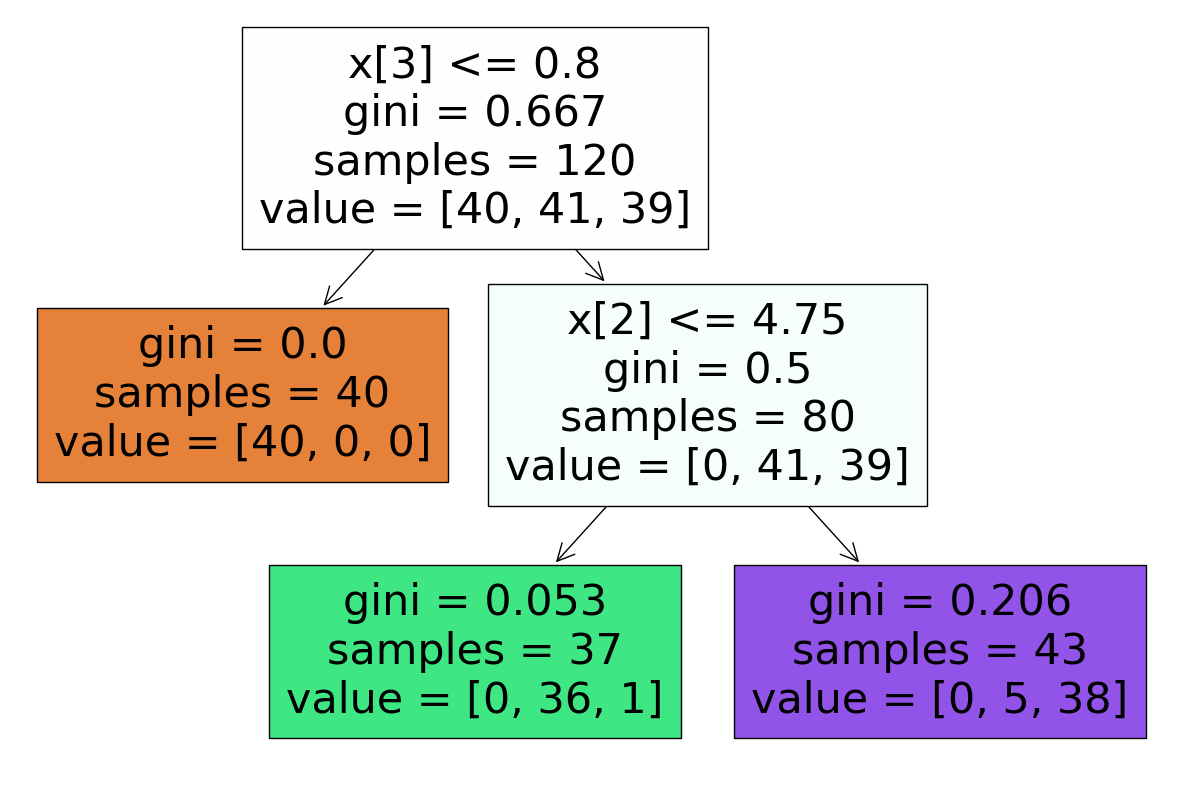

In [109]:
# Visualize the Decision Tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier, filled=True)

In [110]:
y_pred = treeclassifier.predict(X_test)

In [111]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
a_score = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(a_score)
print(cr)

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



## Preprunning and Hyperparameter Tuning

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
params = {'criterion': ["gini", "entropy", "log_loss"],
           'splitter': ["best", "random"],
          'max_depth': [1,2,3,4,5],
          "max_features": ['auto', 'sqrt', 'log2']
         }

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
treemodel = DecisionTreeClassifier()

In [117]:
grid = GridSearchCV(treemodel, param_grid=params, cv=5, scoring='accuracy')

In [ ]:
grid.fit(X_train, y_train)

In [120]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [121]:
grid.best_score_

0.9416666666666668

In [122]:
y_pred = grid.predict(X_test)

In [123]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
a_score = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(a_score)
print(cr)

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

